In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service


options = Options()
options.add_argument('--headless')

driver = webdriver.Chrome(service=Service("/usr/bin/chromedriver"), options=options)

driver.set_window_size(1920, 1080)  # width, height
driver.maximize_window()

In [3]:
website_url = 'https://bestaijobs.com/'

# navigate to a webpage
driver.get(website_url) # 微信公众平台网址
#scroll_by_mouse(driver)

# help(driver)
driver.save_screenshot('aijobs-list.png')

True

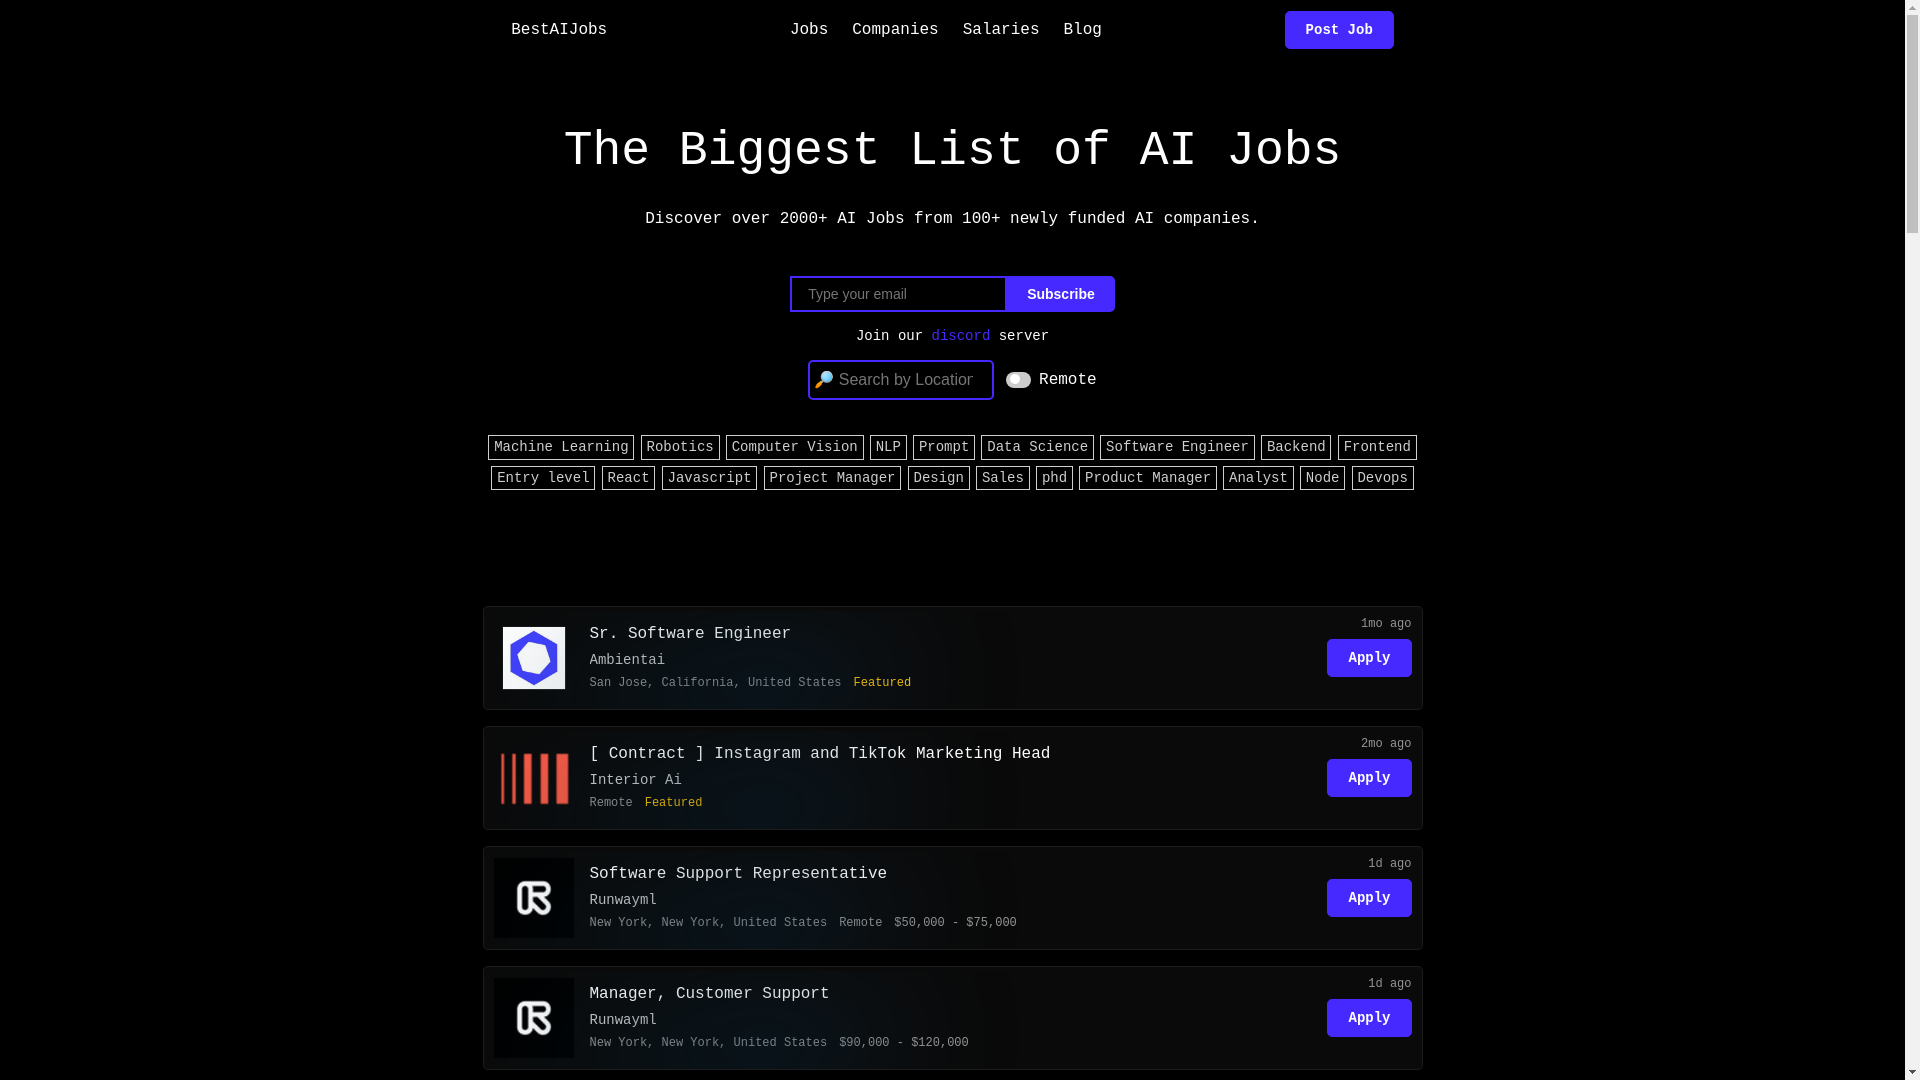

In [4]:
from PIL import Image

Image.open('aijobs-list.png')

In [5]:
import time
import random
from selenium.webdriver.common.by import By


job_elements = driver.find_elements(By.CLASS_NAME, 'job')
jobtitle_elements = driver.find_elements(By.CLASS_NAME, 'job-title-company-tags')

print(len(job_elements), len(jobtitle_elements))

30 30


In [7]:
e = jobtitle_elements[3]
e.text

'Manager, Customer Support\nRunwayml\nNew York, New York, United States\n$90,000 - $120,000'

In [9]:
e.find_element(By.CLASS_NAME, 'job-title').text

'Manager, Customer Support'

In [10]:
e.find_element(By.CLASS_NAME, 'job-title').get_attribute('href')

'https://bestaijobs.com/manager-customer-support-runwayml/10537'

In [13]:
def extract_info(element):
    et = element.find_element(By.CLASS_NAME, 'job-title')
    title, url = et.text, et.get_attribute('href')
    company = element.find_element(By.CLASS_NAME, 'job-company').text
    tags = element.find_element(By.CLASS_NAME, 'job-tags').text.split('\n')
    return {'title':title, 'url':url, 'company':company, 'tags':tags}

In [14]:
import pandas as pd

info = pd.DataFrame([extract_info(e) for e in jobtitle_elements])
info.head()

,title,url,company,tags
0,Sr. Software Engineer,https://bestaijobs.com/sr-software-engineer-am...,Ambientai,"[San Jose, California, United States, Featured]"
1,[ Contract ] Instagram and TikTok Marketing Head,https://bestaijobs.com/contract-instagram-and-...,Interior Ai,"[Remote, Featured]"
2,Software Support Representative,https://bestaijobs.com/software-support-repres...,Runwayml,"[New York, New York, United States, Remote, $5..."
3,"Manager, Customer Support",https://bestaijobs.com/manager-customer-suppor...,Runwayml,"[New York, New York, United States, $90,000 - ..."
4,"Senior Manager, Partner Development",https://bestaijobs.com/senior-manager-partner-...,Whatnot,"[Remote - North America, Remote, $20,000]"


In [15]:
job_urls = list(info['url'])
job_urls[:3]

['https://bestaijobs.com/sr-software-engineer-ambientai/10084',
 'https://bestaijobs.com/contract-instagram-and-tiktok-marketing-head-interior-ai/8640',
 'https://bestaijobs.com/software-support-representative-runwayml/10538']

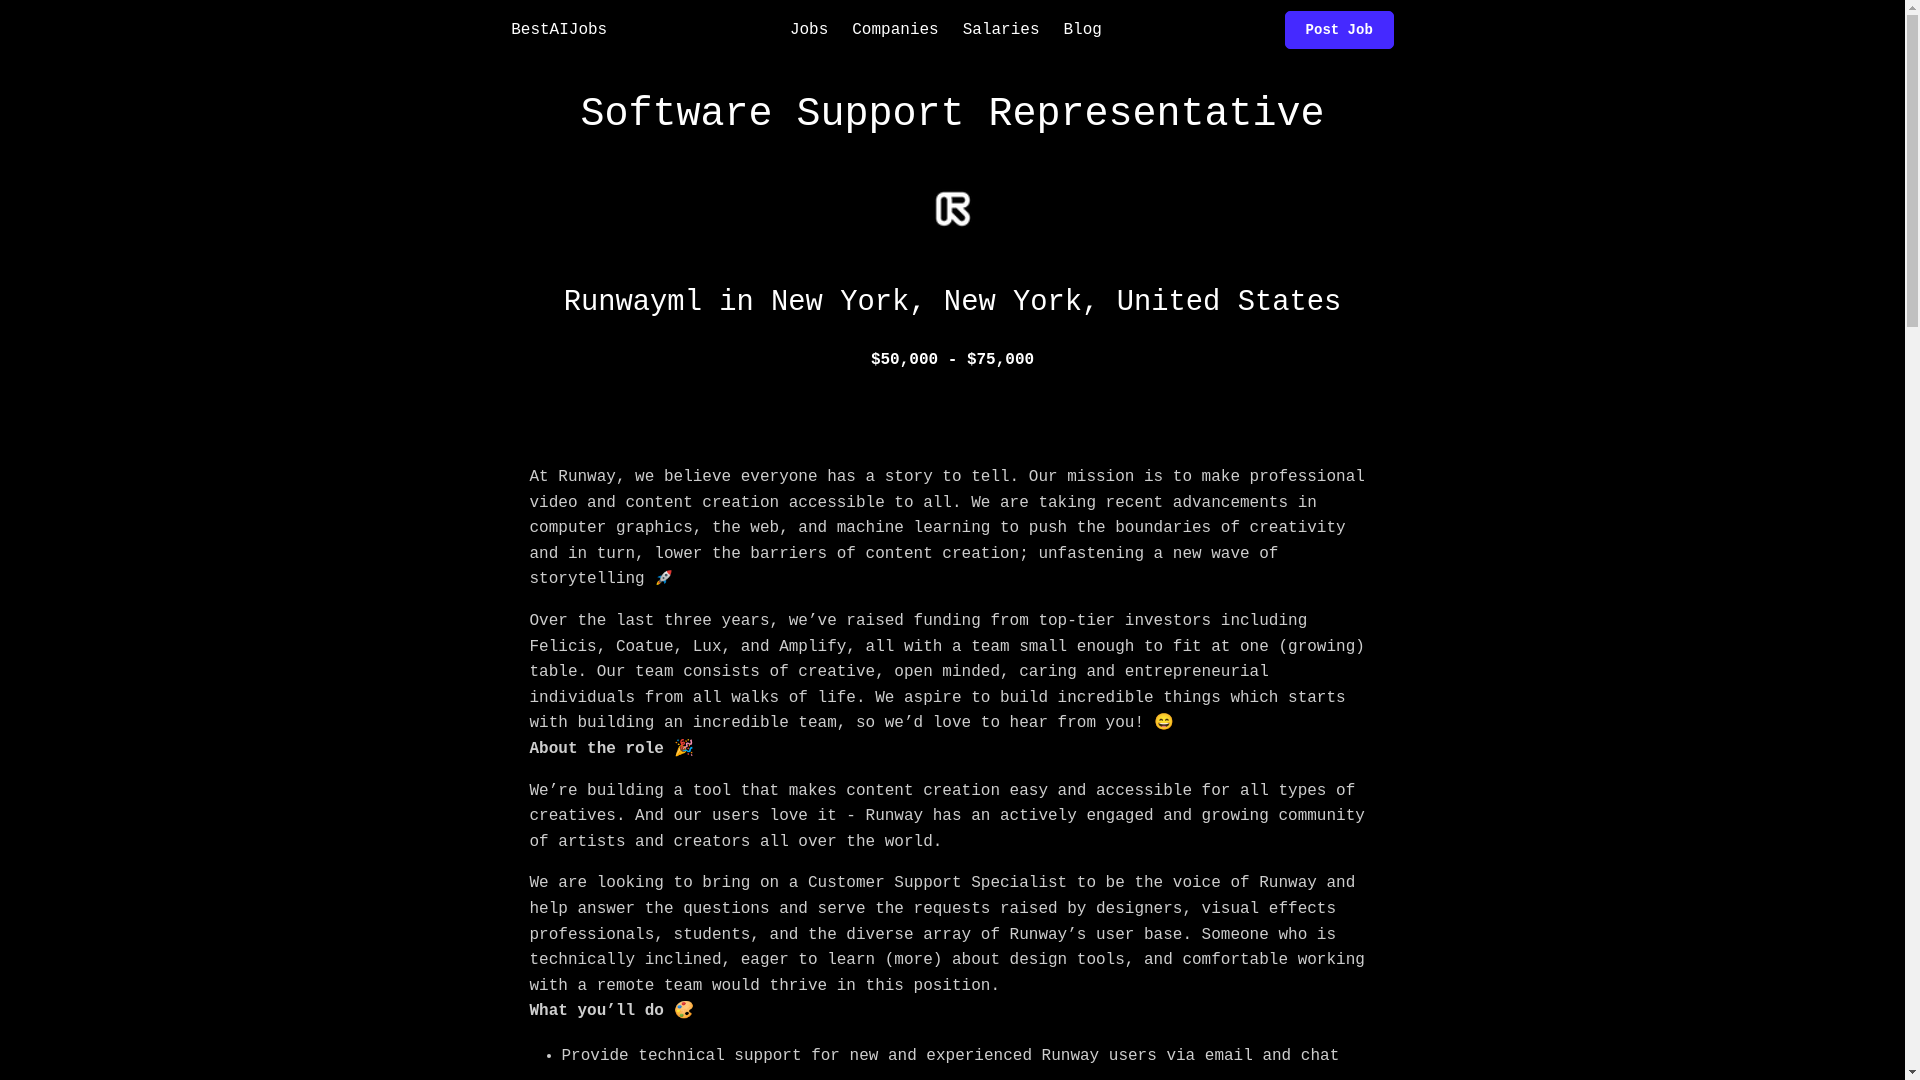

In [16]:
driver.get(job_urls[2]) # 微信公众平台网址
#scroll_by_mouse(driver)

# help(driver)
driver.save_screenshot('job-description.png')

Image.open('job-description.png')

In [19]:
driver.find_element(By.CLASS_NAME, 'job__company').text

'Runwayml in New York, New York, United States'

In [20]:
driver.find_element(By.CLASS_NAME, 'job__description').text

"At Runway, we believe everyone has a story to tell. Our mission is to make professional video and content creation accessible to all. We are taking recent advancements in computer graphics, the web, and machine learning to push the boundaries of creativity and in turn, lower the barriers of content creation; unfastening a new wave of storytelling 🚀\nOver the last three years, we’ve raised funding from top-tier investors including Felicis, Coatue, Lux, and Amplify, all with a team small enough to fit at one (growing) table. Our team consists of creative, open minded, caring and entrepreneurial individuals from all walks of life. We aspire to build incredible things which starts with building an incredible team, so we’d love to hear from you! 😄\nAbout the role 🎉\nWe’re building a tool that makes content creation easy and accessible for all types of creatives. And our users love it - Runway has an actively engaged and growing community of artists and creators all over the world.\nWe are 

In [21]:
driver.find_element(By.CLASS_NAME, 'link-whole-page').get_attribute('href')

'https://boards.greenhouse.io/runwayml/jobs/4115201005?utm_source=bestaijobs.com&ref=bestaijobs.com&src=bestaijobs.com&source=bestaijobs.com#application_form'

In [25]:
def extract_description(element):
    location = element.find_element(By.CLASS_NAME, 'job__company').text
    salary = element.find_element(By.CLASS_NAME, 'job__salary').text
    description = element.find_element(By.CLASS_NAME, 'job__description').text
    orig_url = element.find_element(By.CLASS_NAME, 'link-whole-page').get_attribute('href')
    pos = orig_url.find('?utm')
    if pos > 0: orig_url = orig_url[:pos]
    return {'location': location, 'salary': salary, 'description': description, 'orig_url': orig_url}

In [26]:
extract_description(driver)

{'location': 'Runwayml in New York, New York, United States',
 'salary': '$50,000 - $75,000',
 'description': "At Runway, we believe everyone has a story to tell. Our mission is to make professional video and content creation accessible to all. We are taking recent advancements in computer graphics, the web, and machine learning to push the boundaries of creativity and in turn, lower the barriers of content creation; unfastening a new wave of storytelling 🚀\nOver the last three years, we’ve raised funding from top-tier investors including Felicis, Coatue, Lux, and Amplify, all with a team small enough to fit at one (growing) table. Our team consists of creative, open minded, caring and entrepreneurial individuals from all walks of life. We aspire to build incredible things which starts with building an incredible team, so we’d love to hear from you! 😄\nAbout the role 🎉\nWe’re building a tool that makes content creation easy and accessible for all types of creatives. And our users love 

In [33]:
from tqdm.auto import tqdm

def extract_one_page(url):
    driver.get(url)
    time.sleep(1)
    job_elements = driver.find_elements(By.CLASS_NAME, 'job-title-company-tags')
    job_info = [extract_info(e) for e in job_elements]
    for i in tqdm(range(len(job_info))):
        info = job_info[i]
        driver.get(info['url'])
        time.sleep(random.random())
        description = extract_description(driver)
        info.update(description)
    return job_info

In [34]:
info = extract_one_page(website_url)

MaxRetryError: HTTPConnectionPool(host='localhost', port=41463): Max retries exceeded with url: /session/604e26a8f020d0c5264d2c8f48774b57/url (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f15b054ffd0>: Failed to establish a new connection: [Errno 111] Connection refused'))